In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


2024-09-26 23:43:27.254665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 23:43:27.369493: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 23:43:27.385201: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 23:43:27.544558: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-26 23:43:30.505165: W tensorflow/compiler/tf2

In [2]:
print(tf.__version__)

2.17.0


In [2]:
# Load the data

path = "/home/guts/Documents/accel_data/merged_data.csv"
df = pd.read_csv(path)
df

,Timestamp,Linear x,Linear y,Linear z,Filtered x,Filtered y,Filtered z,Angular x,Angular y,Angular z
0,2024-08-23 14:24:45,-0.08,0.01,0.14,-0.149835,0.008999,-10.120889,0.006762,-0.004553,0.004431
1,2024-08-23 14:24:53,-0.14,-0.01,0.15,-0.305458,-0.085572,-10.058042,-0.004956,-0.005618,-0.003025
2,2024-08-23 14:25:05,-0.10,0.03,0.10,-0.296480,0.041919,-10.014946,0.002501,0.010361,0.005497
3,2024-08-23 14:25:09,-0.05,0.11,-0.15,-0.257574,-0.110112,-10.016742,0.005697,-0.014140,-0.004091
4,2024-08-23 14:25:14,-0.05,0.01,0.17,-0.142054,-0.128069,-9.561244,-0.008151,0.007165,0.004431
...,...,...,...,...,...,...,...,...,...,...
49195,2024-08-28 09:32:59,0.23,-0.10,-0.38,-2.314792,-1.306016,-8.895657,-0.006021,0.003969,-0.020070
49196,2024-08-28 09:33:04,-0.05,-0.02,-0.10,-1.636634,-0.231618,-9.140464,0.016350,-0.005618,0.011888
49197,2024-08-28 09:33:06,-0.09,-0.03,0.04,-2.512314,-1.347316,-10.022128,-0.011347,0.002904,0.025737
49198,2024-08-28 09:33:07,-0.07,-0.05,-0.27,-2.360282,-1.757323,-8.970475,-0.000695,0.014622,-0.010482


In [4]:
# Preprocess the data if needed

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df

,Timestamp,Linear x,Linear y,Linear z,Filtered x,Filtered y,Filtered z,Angular x,Angular y,Angular z
0,2024-08-23 14:24:45,-0.08,0.01,0.14,-0.149835,0.008999,-10.120889,0.006762,-0.004553,0.004431
1,2024-08-23 14:24:53,-0.14,-0.01,0.15,-0.305458,-0.085572,-10.058042,-0.004956,-0.005618,-0.003025
2,2024-08-23 14:25:05,-0.10,0.03,0.10,-0.296480,0.041919,-10.014946,0.002501,0.010361,0.005497
3,2024-08-23 14:25:09,-0.05,0.11,-0.15,-0.257574,-0.110112,-10.016742,0.005697,-0.014140,-0.004091
4,2024-08-23 14:25:14,-0.05,0.01,0.17,-0.142054,-0.128069,-9.561244,-0.008151,0.007165,0.004431
...,...,...,...,...,...,...,...,...,...,...
49195,2024-08-28 09:32:59,0.23,-0.10,-0.38,-2.314792,-1.306016,-8.895657,-0.006021,0.003969,-0.020070
49196,2024-08-28 09:33:04,-0.05,-0.02,-0.10,-1.636634,-0.231618,-9.140464,0.016350,-0.005618,0.011888
49197,2024-08-28 09:33:06,-0.09,-0.03,0.04,-2.512314,-1.347316,-10.022128,-0.011347,0.002904,0.025737
49198,2024-08-28 09:33:07,-0.07,-0.05,-0.27,-2.360282,-1.757323,-8.970475,-0.000695,0.014622,-0.010482


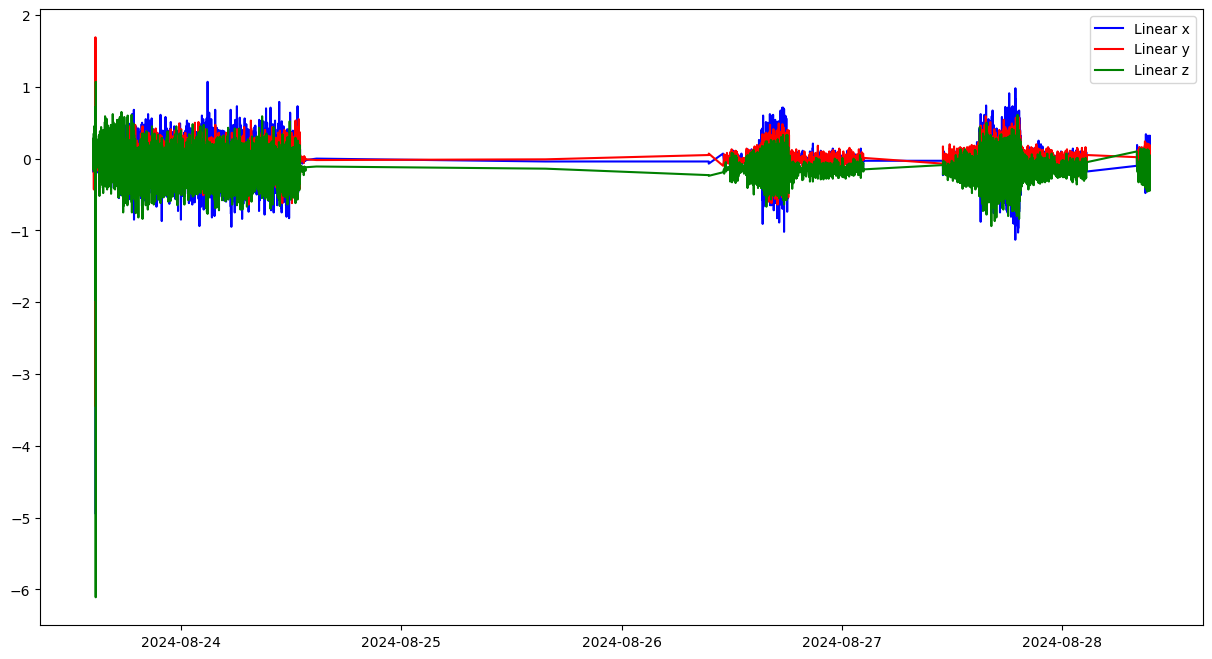

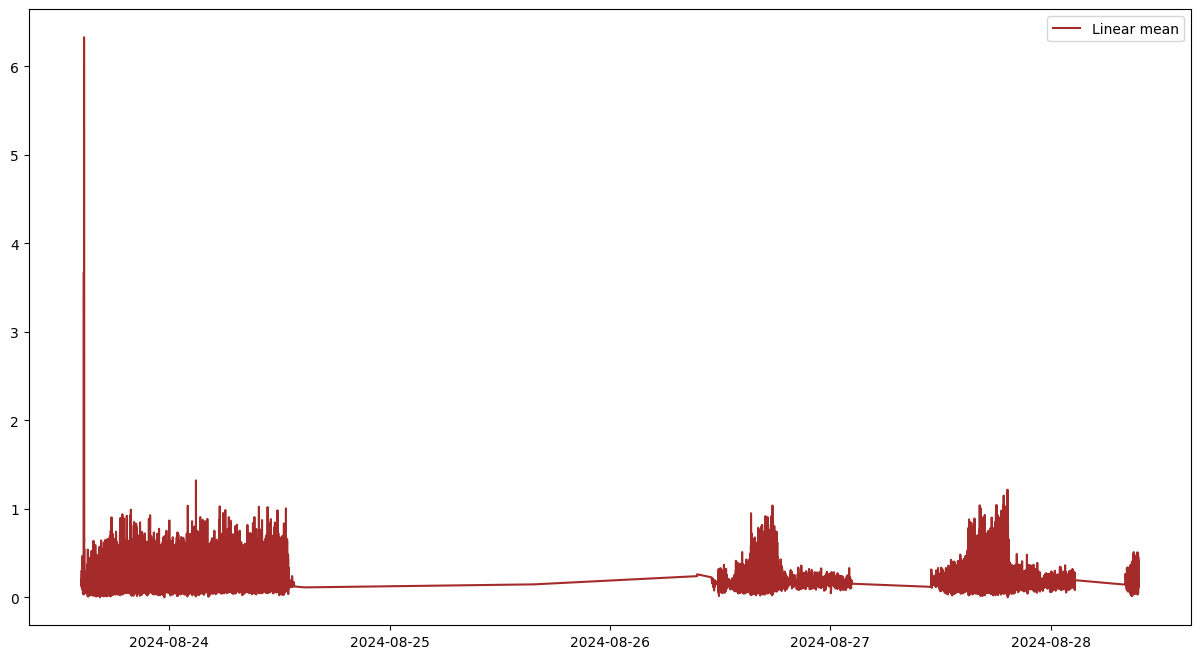

In [5]:
# Plot the data

plt.figure(figsize=(15, 8))
plt.plot(df['Timestamp'],df['Linear x'], label='Linear x', color='blue')
plt.plot(df['Timestamp'],df['Linear y'], label='Linear y', color='red')
plt.plot(df['Timestamp'],df['Linear z'], label='Linear z', color='green')
plt.legend()
plt.show()

df['Linear rms'] = np.sqrt(df['Linear x']**2 + df['Linear y']**2 + df['Linear z']**2)
plt.figure(figsize=(15, 8))
plt.plot(df['Timestamp'],df['Linear rms'], label='Linear mean', color='brown')
plt.legend()
plt.show()

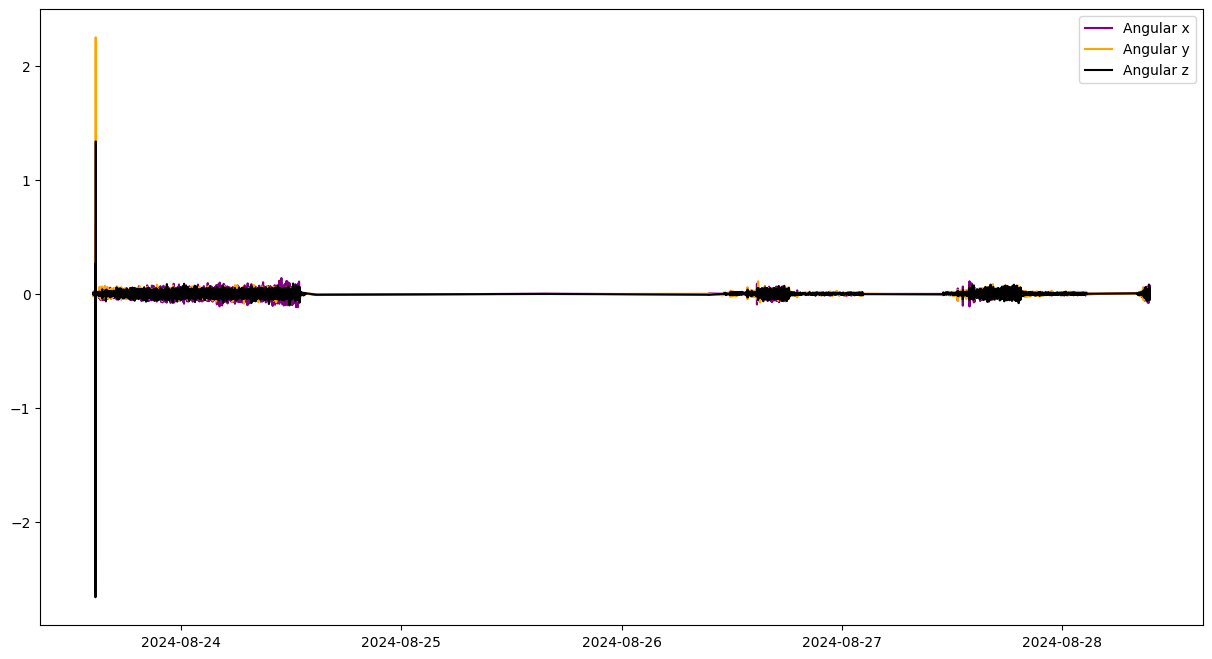

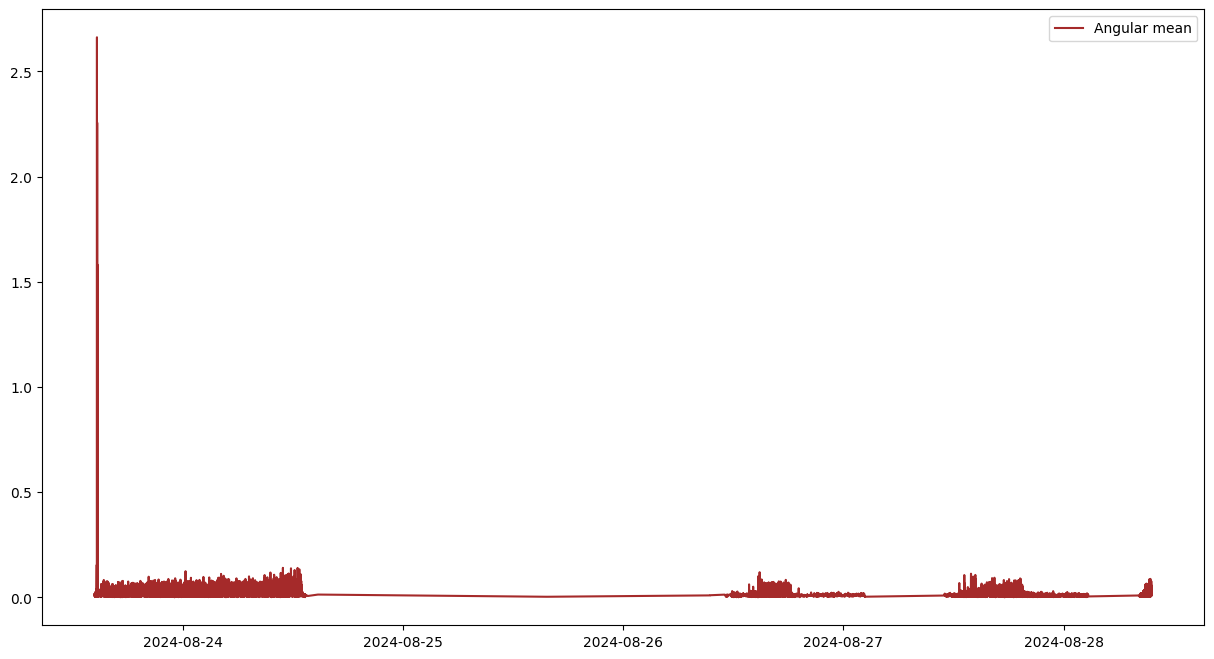

In [6]:
plt.figure(figsize=(15, 8))
plt.plot(df['Timestamp'],df['Angular x'], label='Angular x', color='purple')
plt.plot(df['Timestamp'],df['Angular y'], label='Angular y', color='orange')
plt.plot(df['Timestamp'],df['Angular z'], label='Angular z', color='black')
plt.legend()
plt.show()

df['Angular rms'] = np.sqrt(df['Angular x']**2 + df['Angular y']**2 + df['Angular z']**2)
plt.figure(figsize=(15, 8))
plt.plot(df['Timestamp'],df['Angular rms'], label='Angular mean', color='brown')
plt.legend()
plt.show()

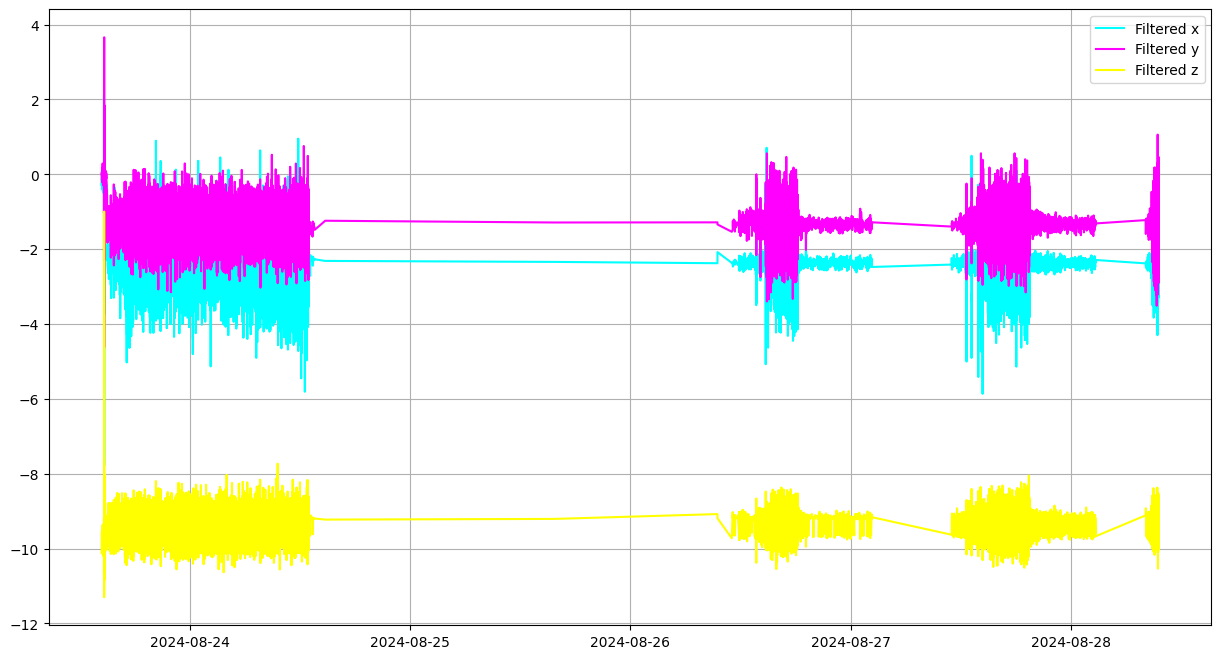

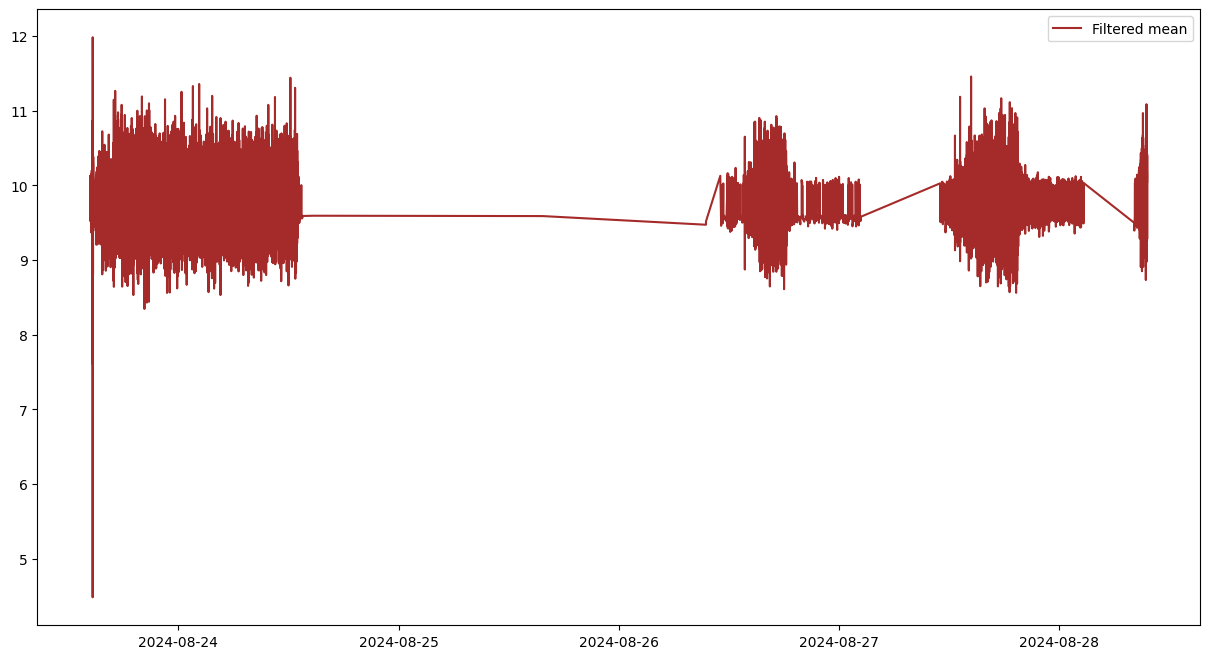

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(df['Timestamp'],df['Filtered x'], label='Filtered x', color='cyan')
plt.plot(df['Timestamp'],df['Filtered y'], label='Filtered y', color='magenta')
plt.plot(df['Timestamp'],df['Filtered z'], label='Filtered z', color='yellow')
plt.grid()
plt.legend()
plt.show()

df['Filtered rms'] = np.sqrt(df['Filtered x']**2 + df['Filtered y']**2 + df['Filtered z']**2)   
plt.figure(figsize=(15, 8))
plt.plot(df['Timestamp'],df['Filtered rms'], label='Filtered mean', color='brown')
plt.legend()
plt.show()

In [8]:
# Function to convert a DataFrame to input sequences and labels for a time series prediction model
def df_to_x_y(df, window_size):
    df_as_np = df.to_numpy()
    x = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]] # Create a 2D array of the current window of data
        x.append(row) # Append the 2D array to the input sequences list
        label = df_as_np[i+window_size] # Append the label for the next element to the labels list
        y.append(label)
    return np.array(x), np.array(y)

In [9]:
WINDOW_SIZE = 5
x, y =df_to_x_y(df['Linear x'], WINDOW_SIZE)
x.shape, y.shape

((49195, 5, 1), (49195,))

In [10]:
# Split the data into train, test and validation

X_train, y_train = x[:2000], y[:2000]
X_val, y_val = x[2000:2500], y[2000:2500]
X_test, y_test = x[2500:], y[2500:]

In [11]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, InputLayer, StackedRNNCells, LSTMCell, RNN


# Define LSTM cells
lstm_cell_1 = LSTMCell(units=512)
lstm_cell_2 = LSTMCell(units=256)
lstm_cell_3 = LSTMCell(units=128)


# Stack the LSTM cells
stacked_lstm = StackedRNNCells([lstm_cell_1, lstm_cell_2, lstm_cell_3])

# Create the RNN layer with the stacked LSTM cells
rnn_layer = RNN(stacked_lstm)

# Build the model
model1 = Sequential()
model1.add(InputLayer(input_shape=(WINDOW_SIZE, 1)))  # Define input shape
model1.add(rnn_layer)  # Add the custom stacked RNN layer
model1.add(Dense(64, activation='relu'))  # Fully connected layer
model1.add(Dense(1))  # Output layer

# Print the model summary
model1.summary()


I0000 00:00:1724843563.681609   23482 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-28 13:12:43.722468: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rnn (RNN)                       │ (None, 128)            │     2,037,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,045,569 (7.80 MB)

 Trainable params: 2,045,569 (7.80 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

# Create a callback to save the best model during training

cp = ModelCheckpoint(filepath='models/best_model.keras', save_best_only=True)
model1.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [13]:
# Train the model
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[cp])

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0103 - root_mean_squared_error: 0.0983 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1057
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0097 - root_mean_squared_error: 0.0956 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1094
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0142 - root_mean_squared_error: 0.1122 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1104
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0094 - root_mean_squared_error: 0.0925 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1103
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0244 - root_mean_squared_error: 0.1500 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1094
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0169 - root_mean_squared_error: 0.1226 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1070
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss:

In [14]:
from tensorflow.keras.models import load_model

# Load the best model
model1 = load_model('models/best_model.keras')

In [15]:
# Evaluate the model on the test data

train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions' :train_predictions, 'Actual' :y_train})
train_results

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


,Train Predictions,Actual
0,-0.007722,0.00
1,-0.005808,0.00
2,-0.001456,-0.06
3,0.002576,-0.08
4,0.002629,-0.09
...,...,...
1995,0.007330,-0.02
1996,0.002068,0.04
1997,0.006101,-0.03
1998,0.007862,0.00


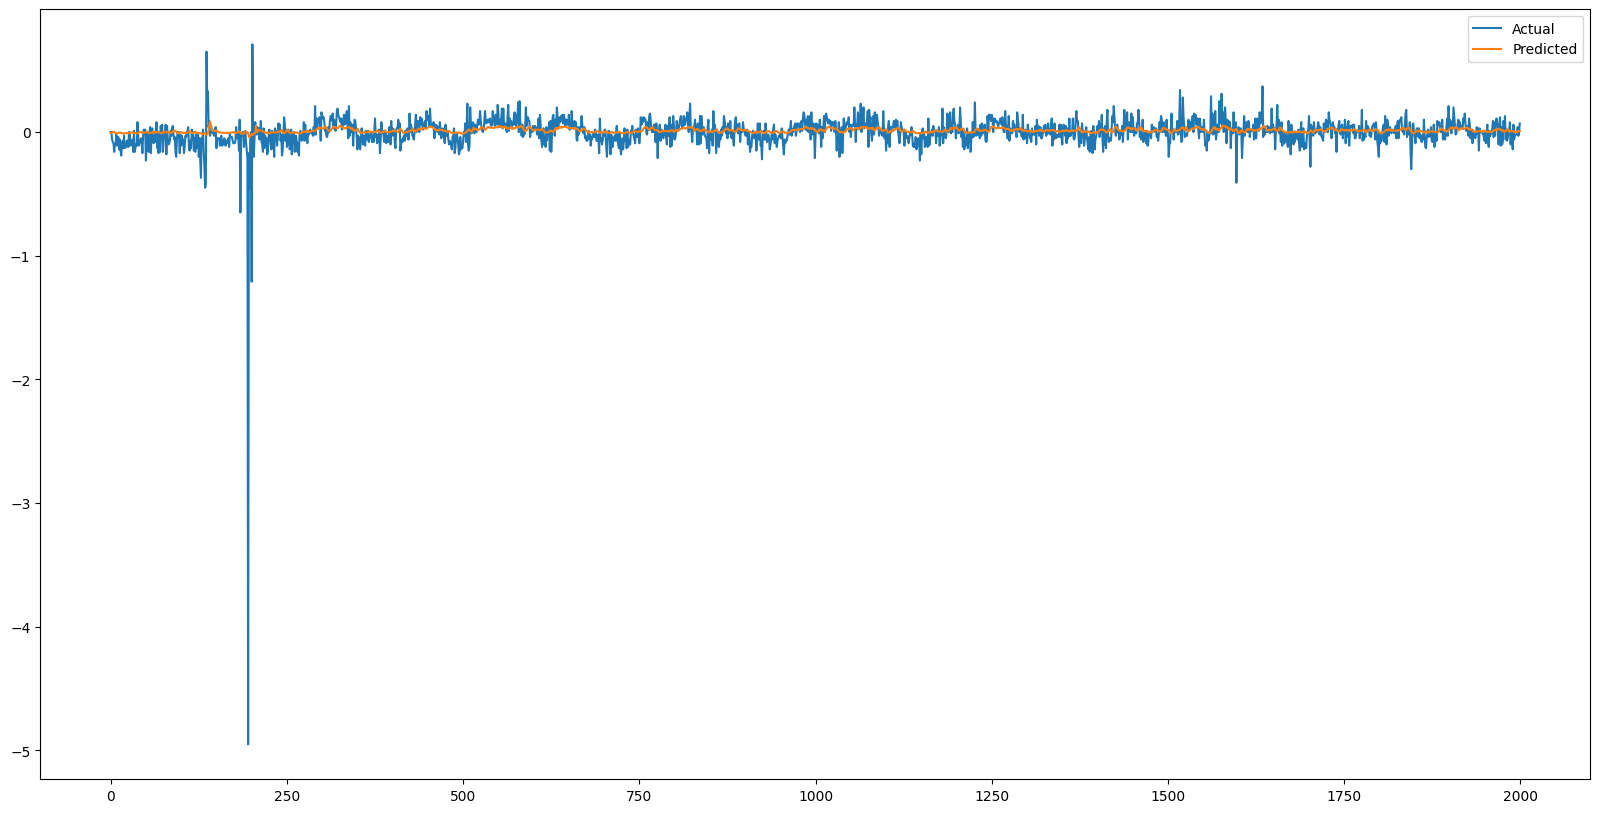

In [16]:
# Plot the predictions and actual values

plt.figure(figsize=(20,10))
plt.plot(train_results['Actual'])
plt.plot(train_results['Train Predictions'])
plt.legend(['Actual', 'Predicted'])
plt.show()


In [17]:
# Generate predictions for the validation set using model1 and flatten the result to a 1D array

val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actual': y_val})
val_results

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


,Val Predictions,Actual
0,0.011777,-0.16
1,0.010643,0.00
2,0.005428,0.10
3,0.007933,-0.08
4,0.007309,0.04
...,...,...
495,0.033827,0.08
496,0.029011,-0.18
497,0.031894,0.08
498,0.021629,-0.14


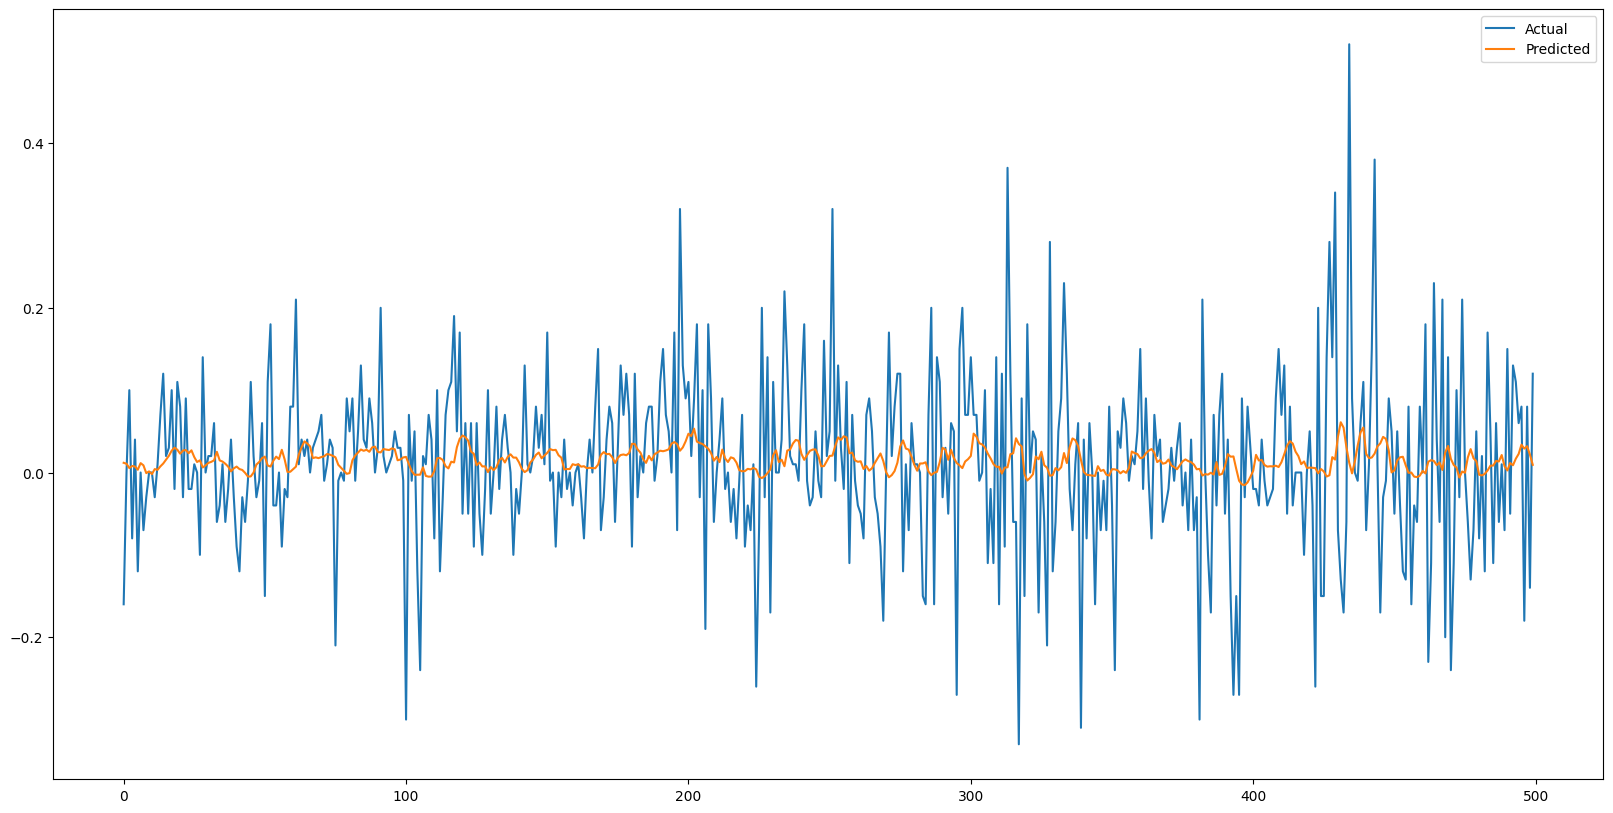

In [18]:
# Plot the predictions and actual values for the validation set

plt.figure(figsize=(20,10))
plt.plot(val_results['Actual'])
plt.plot(val_results['Val Predictions'])
plt.legend(['Actual', 'Predicted'])
plt.show()

In [19]:
# Generate predictions for the test set using model1 and flatten the result to a 1D array

test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions' :test_predictions, 'Actual' :y_test})
test_results

1460/1460 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step


,Test Predictions,Actual
0,0.005147,0.04
1,0.002349,-0.08
2,0.013973,0.07
3,0.009699,-0.41
4,0.009988,-0.13
...,...,...
46690,0.040109,0.23
46691,0.047501,-0.05
46692,0.049249,-0.09
46693,0.040168,-0.07


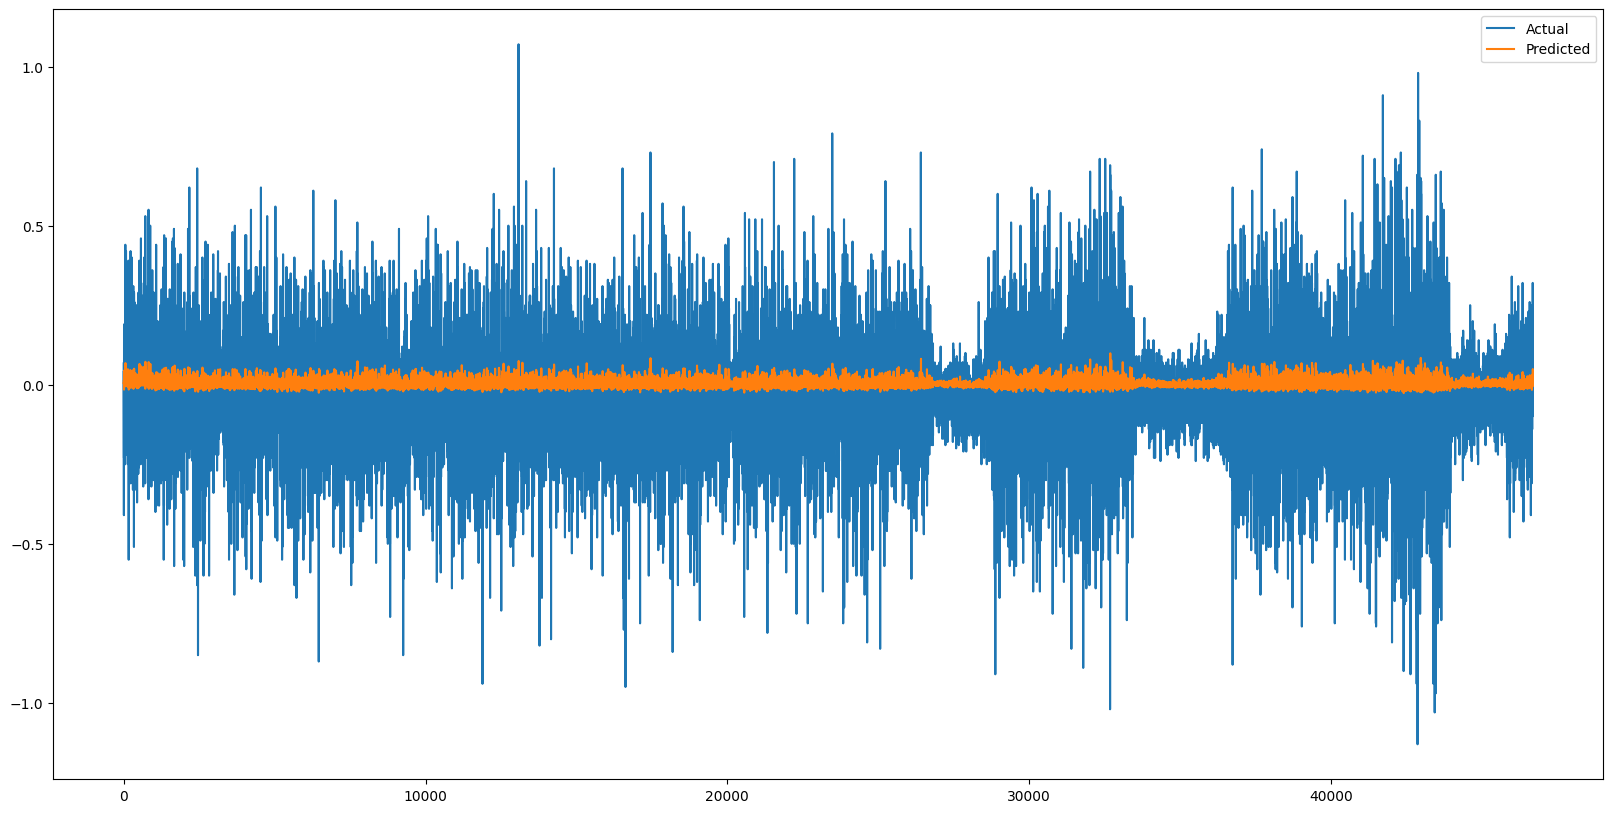

In [20]:
# Plot the predictions and actual values for the test set

plt.figure(figsize=(20,10))
plt.plot(test_results['Actual'])
plt.plot(test_results['Test Predictions'])
plt.legend(['Actual', 'Predicted'])
plt.show()